# 第7章のソースコード

## リスト7.1: TokenとURLを設定

'TOKEN', 'URL'は、IBM Q Experienceから発行されたご自身のものに書き換えて実行してください。

In [0]:
from qiskit import IBMQ
IBMQ.enable_account('TOKEN', 'URL')

## リスト7.2: 量子コンピュータを実行するプログラム(実行する毎に結果は変化します)

In [2]:
from qiskit import QuantumCircuit
from qiskit import ClassicalRegister, QuantumRegister
from qiskit import execute
import time
from qiskit.providers.jobstatus import JOB_FINAL_STATES

# 量子回路の初期化
qr = QuantumRegister(2, 'q') # 量子レジスタを作成
cr = ClassicalRegister(2, 'c') # 古典レジスタを作成
circuit = QuantumCircuit(qr, cr) # レジスタを使い量子回路を初期化

# 量子回路の組み立て
circuit.h(qr[0]) # アダマール行列を適用
circuit.cx(qr[0], qr[1]) # CNOTを適用

# 測定
circuit.measure(qr, cr)

# 実行と結果取得
backend = IBMQ.get_backend('ibmqx4') # デバイス指定 
job = execute(circuit, backend) # 量子プログラムを実行

# 実行が終了するまで待機
start_time = time.time()
job_status = job.status()
while job_status not in JOB_FINAL_STATES:
    time.sleep(10)
    job_status = job.status()
    print('%0.0f s' % float(time.time()-start_time))

result = job.result() # 結果を取得
print(result.get_counts(circuit)) # 結果をテキスト表示

10 s
21 s
32 s
42 s
52 s
63 s
73 s
84 s
94 s
105 s
115 s
125 s
136 s
146 s
157 s
167 s
178 s
188 s
198 s
{'10': 45, '11': 326, '01': 144, '00': 509}


## リスト7.4: ヒストグラム表示(実行する毎に結果は変化します)

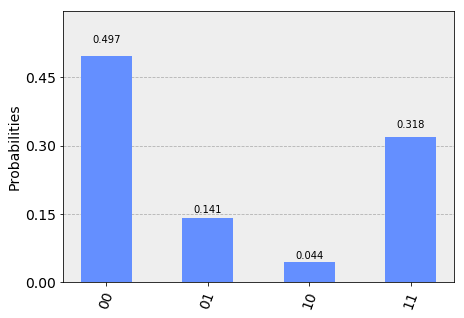

In [3]:
from qiskit.visualization import plot_histogram

# ヒストグラム表示
plot_histogram(job.result().get_counts(circuit))